In [50]:
#general import
import io
import pandas as pd
from datetime import datetime
import pandas as pd
import numpy as np



from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns


from scipy.stats import iqr
import scipy.stats 
from scipy.stats import t
from scipy.stats import norm
from numpy.random import seed


from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

from yellowbrick.cluster import KElbowVisualizer


In [3]:
today=datetime.today()

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### 1.  all the Pre fuctions here

In [5]:
def summarize_dataframe(df):
    # Size of the DataFrame (rows, columns)
    size = df.shape

    # Columns with null values and the count of null values per column
    null_info = df.isnull().sum()

    # Data types of the columns
    dtypes = df.dtypes

    # Display the summary
    summary = {
        'size': size,
        'null_values_per_column': null_info,
        'dtypes': dtypes
    }
    
    return summary

In [6]:
def calculate_outliers(data, column_name):

    # Calculate Q1 Q3
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    upper_bound = Q3 + (IQR * 1.5)
    lower_bound = Q1 - (IQR * 1.5)
    # Identify outliers
    outlier_above = [n for n in data[column_name].values if n > upper_bound]
    outlier_below = [n for n in data[column_name].values if n < lower_bound]
    
    # Find the outliers (values outside the upper and lower bounds)
    outliers = [n for n in data[column_name].values if n < lower_bound or n > upper_bound]

    # Print outliers and bounds
    print(f"Outliers for column '{column_name}':", outliers)
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    
    # Boxplot visualization
    sns.boxplot(data[column_name], color='#31668a')
    plt.title(f'Boxplot for {column_name}')
    plt.show()
    
    return outliers, outlier_above, outlier_below, lower_bound, upper_bound

In [7]:

def Bar_Chart(data, f1):
    # Group by feature and count the rows for each group
    clean_data_feature = data.groupby(f1).size().sort_values(ascending=False)
    
    # Plot the grouped data
    clean_data_feature.plot(kind='bar', figsize=(12, 8), fontsize=15, color=['steelblue'])
    
    # Set the title and axis labels
    plt.title(f"{f1.capitalize()} Count Distribution", weight='bold', fontsize=20)
    plt.xlabel(f"{f1.capitalize()}", weight='bold', fontsize=17)
    plt.ylabel("Count", weight='bold', fontsize=17)
    
    # Rotate x-ticks, adjust grid and style
    plt.xticks(rotation=0)
    plt.grid(axis="x")
    
    # Remove the left spine for aesthetic purposes
    sns.despine(left=True)
    
    # Show the plot
    plt.show()

In [8]:
def hitogram(data,f1,f2):
    plt.figure(figsize=(12,8))
    sns.set(style ='whitegrid',font_scale=1.4)

    sns.histplot(data, x=f1, bins=10, hue=f2, palette='muted', kde=True)

    plt.title(f'{f1} Distribution', weight='bold').set_fontsize(20)
    plt.xlabel(f1, weight='bold', fontsize=17)

    plt.xticks(rotation= 0)

    plt.grid(axis="x")
    sns.despine(left=True)
    plt.show()

### 2. Data Cleaning

In [9]:
raw_data=pd.read_csv('marketing_campaign.csv', delimiter='\t')
raw_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [10]:
summarize_dataframe(raw_data)


{'size': (2240, 29),
 'null_values_per_column': ID                      0
 Year_Birth              0
 Education               0
 Marital_Status          0
 Income                 24
 Kidhome                 0
 Teenhome                0
 Dt_Customer             0
 Recency                 0
 MntWines                0
 MntFruits               0
 MntMeatProducts         0
 MntFishProducts         0
 MntSweetProducts        0
 MntGoldProds            0
 NumDealsPurchases       0
 NumWebPurchases         0
 NumCatalogPurchases     0
 NumStorePurchases       0
 NumWebVisitsMonth       0
 AcceptedCmp3            0
 AcceptedCmp4            0
 AcceptedCmp5            0
 AcceptedCmp1            0
 AcceptedCmp2            0
 Complain                0
 Z_CostContact           0
 Z_Revenue               0
 Response                0
 dtype: int64,
 'dtypes': ID                       int64
 Year_Birth               int64
 Education               object
 Marital_Status          object
 Income          

In [11]:
# Convert 'Dt_Customer'  to datetime and add column to calculate days since Dt
raw_data['Dt_Customer'] = pd.to_datetime(raw_data['Dt_Customer'])
raw_data['Dt_Customer'].dtype
raw_data['Days_since_Dt_Customer']=(today-raw_data['Dt_Customer']).dt.days/365
raw_data['Days_since_Dt_Customer']=raw_data['Days_since_Dt_Customer'].astype(int)
raw_data['Days_since_Dt_Customer'].head()



0    12
1    10
2    11
3    10
4    11
Name: Days_since_Dt_Customer, dtype: int32

In [12]:
raw_data["Spent"] = raw_data["MntWines"]+raw_data["MntFruits"]+ raw_data["MntMeatProducts"]+ raw_data["MntFishProducts"]+ raw_data["MntSweetProducts"]+ raw_data["MntGoldProds"]

In [13]:
#Deriving living situation by marital status"Alone"
raw_data["Living_With"]=raw_data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [14]:
#Feature indicating total children living in the household
raw_data["Children"]=raw_data["Kidhome"]+raw_data["Teenhome"]
#Feature pertaining parenthood
raw_data["Is_Parent"] = np.where(raw_data.Children> 0, 1, 0)


In [ ]:
year_today=today.year
year_today
#  calculate days since BD
raw_data['age']=year_today-raw_data['Year_Birth'] 

<AxesSubplot:>

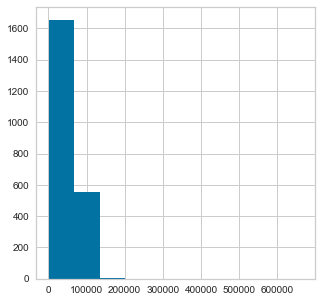

In [16]:
# income is not normal ditributed, so null value should be replaced by median
raw_data['Income'].hist(figsize=(5,5))

In [17]:

raw_data['Income'] =raw_data['Income'].fillna(raw_data['Income'].median())

raw_data.isnull().sum()

ID                        0
Year_Birth                0
Education                 0
Marital_Status            0
Income                    0
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
MntWines                  0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
AcceptedCmp3              0
AcceptedCmp4              0
AcceptedCmp5              0
AcceptedCmp1              0
AcceptedCmp2              0
Complain                  0
Z_CostContact             0
Z_Revenue                 0
Response                  0
Days_since_Dt_Customer    0
Spent                     0
Living_With               0
Children                  0
Is_Parent                 0
age                       0
dtype: int64

In [18]:
raw_data = raw_data.drop(['Marital_Status','Kidhome','Teenhome','Year_Birth','Dt_Customer','Z_Revenue','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Complain', 'Z_CostContact','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2'], axis=1)


In [19]:
clean_data=raw_data

clean_data.head(5)


,ID,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Days_since_Dt_Customer,Spent,Living_With,Children,Is_Parent,age
0,5524,Graduation,58138.0,58,3,8,10,4,7,1,12,1617,Alone,0,0,68
1,2174,Graduation,46344.0,38,2,1,1,2,5,0,10,27,Alone,2,1,71
2,4141,Graduation,71613.0,26,1,8,2,10,4,0,11,776,Partner,0,0,60
3,6182,Graduation,26646.0,26,2,2,0,4,6,0,10,53,Partner,1,1,41
4,5324,PhD,58293.0,94,5,5,3,6,5,0,11,422,Partner,1,1,44


### 3. EDA<br/>
1. Generate a correlation matrix


In [20]:
clean_data.describe()

,ID,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Days_since_Dt_Customer,Spent,Children,Is_Parent,age
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,52237.975446,49.109375,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,11.207143,605.798214,0.950446,0.715179,56.194196
std,3246.662198,25037.955891,28.962453,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.725927,602.249288,0.751803,0.451430,11.984069
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,5.000000,0.000000,0.000000,29.000000
25%,2828.250000,35538.750000,24.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,11.000000,68.750000,0.000000,0.000000,48.000000
50%,5458.500000,51381.500000,49.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,11.000000,396.000000,1.000000,1.000000,55.000000
75%,8427.750000,68289.750000,74.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,12.000000,1045.500000,1.000000,1.000000,66.000000
max,11191.000000,666666.000000,99.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,13.000000,2525.000000,3.000000,1.000000,132.000000


In [21]:
numeric_data = clean_data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr() 
corr_matrix

,ID,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Days_since_Dt_Customer,Spent,Children,Is_Parent,age
ID,1.000000,0.012996,-0.046524,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,-0.021968,-0.010494,-0.018054,-0.000146,0.000493,-0.000028
Income,0.012996,1.000000,-0.004061,-0.082315,0.380554,0.586826,0.526600,-0.549785,0.132867,-0.009821,0.664775,-0.290858,-0.336691,0.160899
Recency,-0.046524,-0.004061,1.000000,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.198437,0.008927,0.020433,0.018053,0.000505,0.019871
NumDealsPurchases,-0.037166,-0.082315,-0.001098,1.000000,0.234185,-0.008617,0.068879,0.347633,0.002238,0.190794,-0.065112,0.439684,0.387273,0.060846
NumWebPurchases,-0.018924,0.380554,-0.010726,0.234185,1.000000,0.378376,0.502713,-0.055846,0.148730,0.162219,0.519837,-0.146361,-0.070101,0.145040
NumCatalogPurchases,-0.003440,0.586826,0.025110,-0.008617,0.378376,1.000000,0.518738,-0.520364,0.220810,0.079100,0.778577,-0.439904,-0.452732,0.121275
NumStorePurchases,-0.014927,0.526600,0.000799,0.068879,0.502713,0.518738,1.000000,-0.428473,0.039363,0.110970,0.674669,-0.321125,-0.286333,0.128272
NumWebVisitsMonth,-0.007446,-0.549785,-0.021445,0.347633,-0.055846,-0.520364,-0.428473,1.000000,-0.003987,0.227713,-0.500218,0.418419,0.478624,-0.121139
Response,-0.021968,0.132867,-0.198437,0.002238,0.148730,0.220810,0.039363,-0.003987,1.000000,0.158555,0.265298,-0.169163,-0.205134,-0.021325
Days_since_Dt_Customer,-0.010494,-0.009821,0.008927,0.190794,0.162219,0.079100,0.110970,0.227713,0.158555,1.000000,0.133238,-0.035196,-0.002512,-0.028601


array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>],
       [<AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>,
        <AxesSubplot:title={'center':'NumWebVisitsMonth'}>],
       [<AxesSubplot:title={'center':'Response'}>,
        <AxesSubplot:title={'center':'Days_since_Dt_Customer'}>,
        <AxesSubplot:title={'center':'Spent'}>,
        <AxesSubplot:title={'center':'Children'}>],
       [<AxesSubplot:title={'center':'Is_Parent'}>,
        <AxesSubplot:title={'center':'age'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

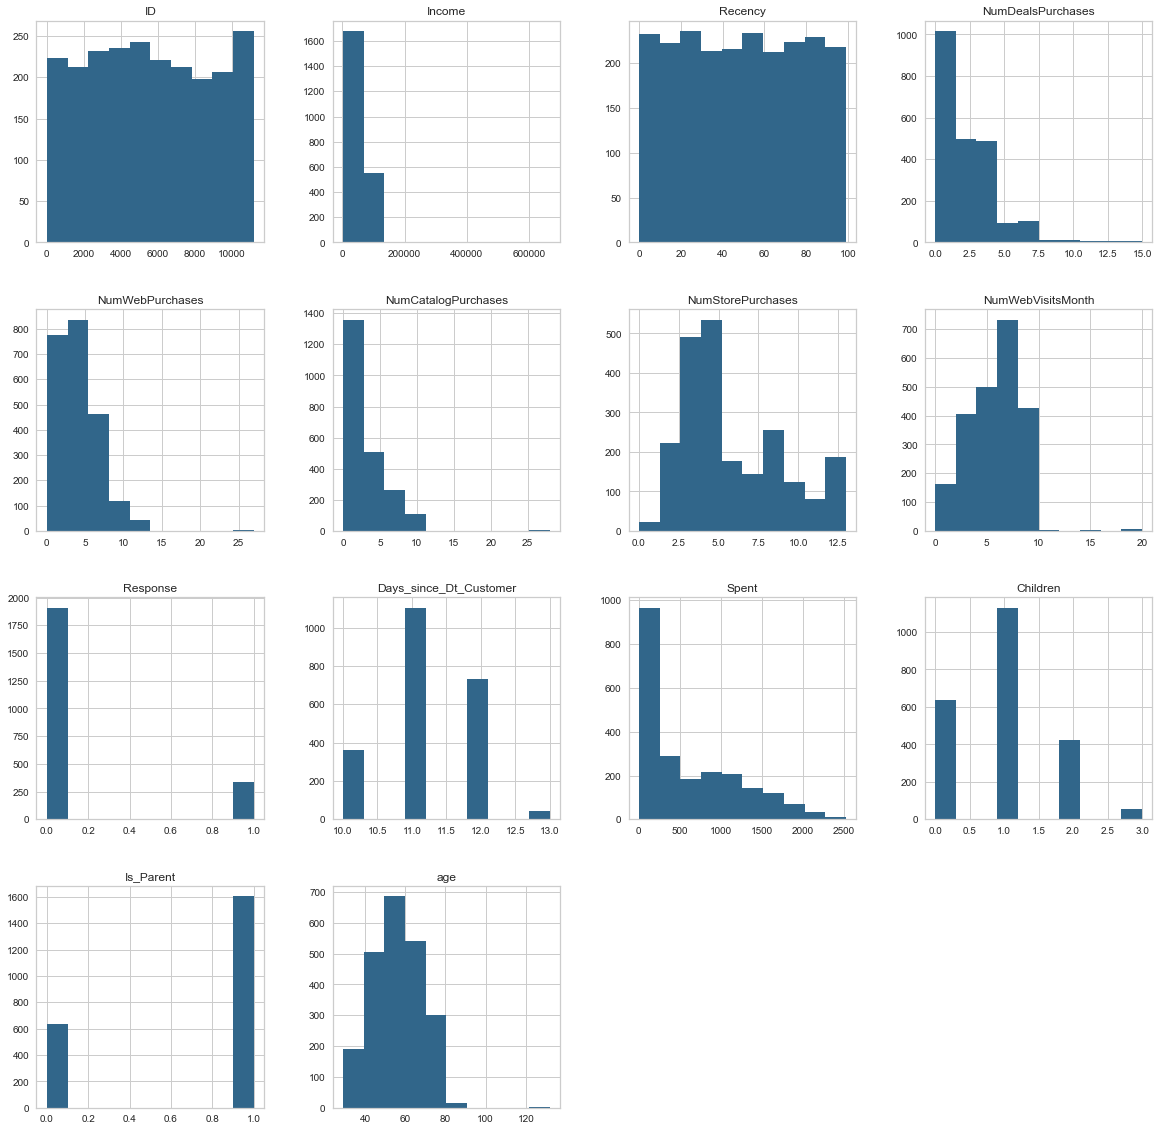

In [22]:
numeric_data.hist(figsize=(20,20),color=('#31668a'))

<ipython-input-23-f85209cee61b>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_numerical = np.triu(np.ones_like(corr_numerical, dtype=np.bool))


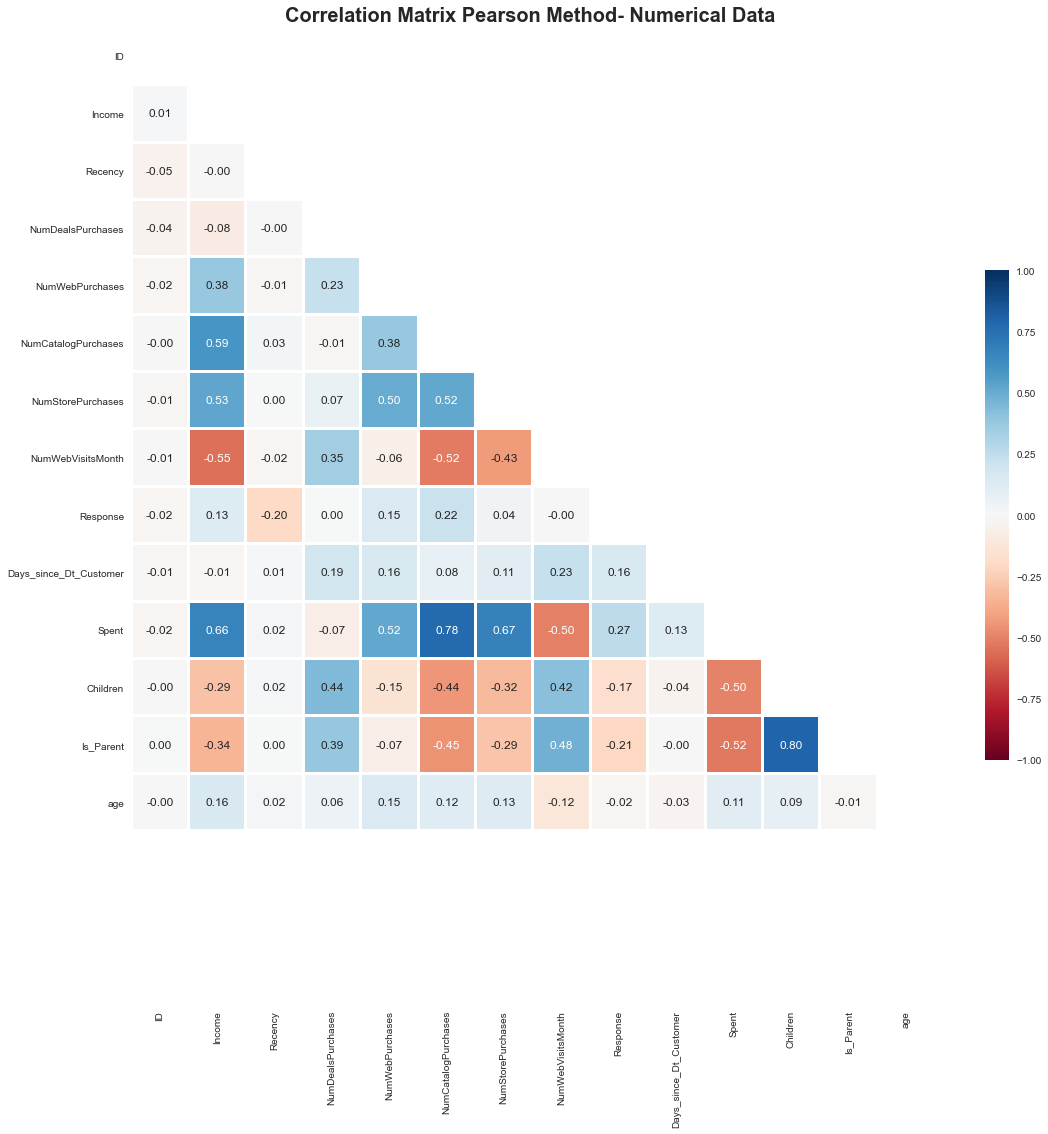

In [23]:
plt.figure(figsize=(18,18))
corr_numerical=clean_data.corr(method='pearson')
mask_numerical = np.triu(np.ones_like(corr_numerical, dtype=np.bool))
sns.heatmap(corr_numerical, annot=True, fmt=".2f", cmap='RdBu', mask= mask_numerical, vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(17, 0))
plt.title('Correlation Matrix Pearson Method- Numerical Data ',weight='bold').set_fontsize('20')

In [24]:
clean_data.head(3)

,ID,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Days_since_Dt_Customer,Spent,Living_With,Children,Is_Parent,age
0,5524,Graduation,58138.0,58,3,8,10,4,7,1,12,1617,Alone,0,0,68
1,2174,Graduation,46344.0,38,2,1,1,2,5,0,10,27,Alone,2,1,71
2,4141,Graduation,71613.0,26,1,8,2,10,4,0,11,776,Partner,0,0,60


In [25]:
print(clean_data['Living_With'].unique())
print(clean_data['Living_With'].isnull().sum())
print(clean_data['Is_Parent'].unique())
print(clean_data['Is_Parent'].isnull().sum())

['Alone' 'Partner']
0
[0 1]
0


<Figure size 576x396 with 0 Axes>

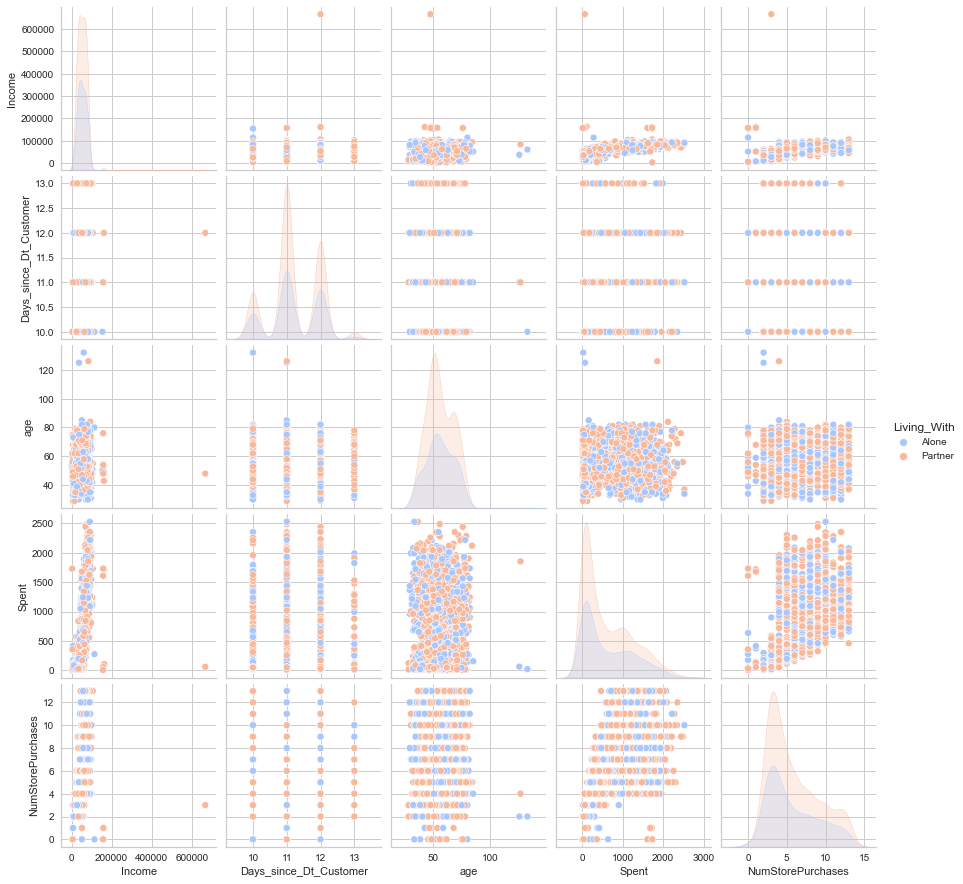

In [26]:
plt.figure()  # Creates a new figure for plotting
sns.pairplot(clean_data, vars= ["Income", "Days_since_Dt_Customer", "age", "Spent", 'NumStorePurchases'],hue='Living_With',palette="coolwarm")  
# Creates a pairplot for the selected features with hue based on 'Living_With' column
plt.show()  # Displays the plot

<Figure size 576x396 with 0 Axes>

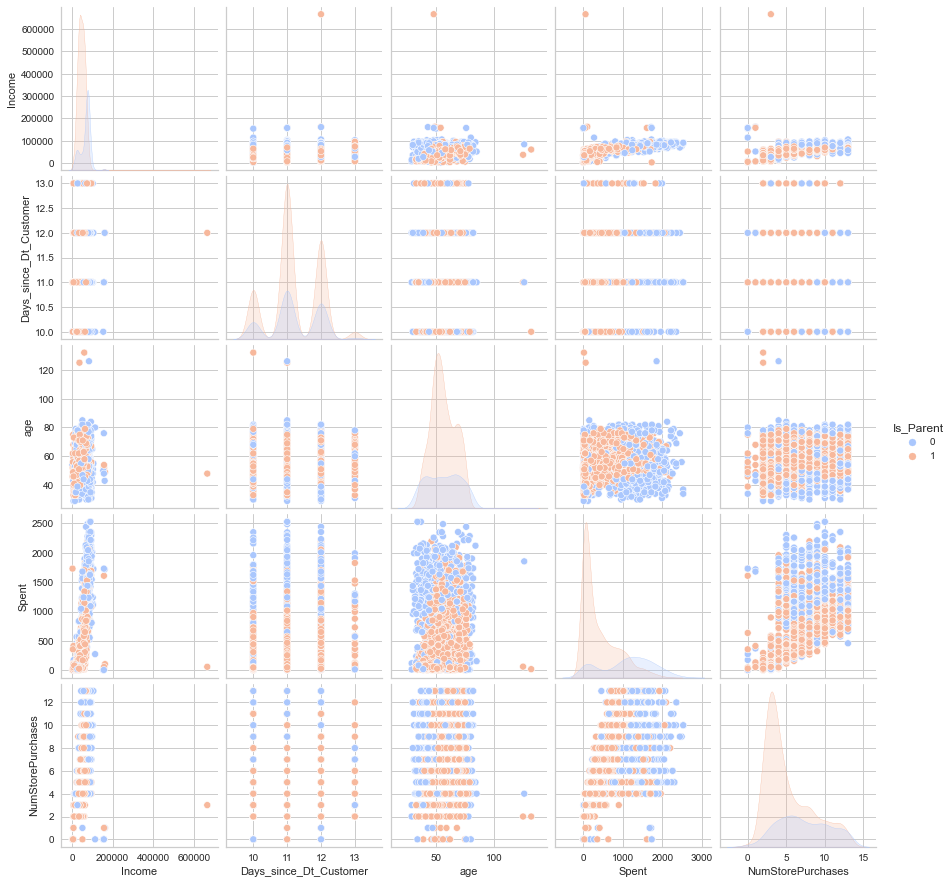

In [27]:
plt.figure()  
sns.pairplot(clean_data, vars= ["Income", "Days_since_Dt_Customer", "age", "Spent", 'NumStorePurchases'],hue='Is_Parent',palette="coolwarm")  

plt.show()  

Outliers for column 'age': [125, 132, 126]
Lower Bound: 21.0
Upper Bound: 93.0


c:\Users\sophia\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


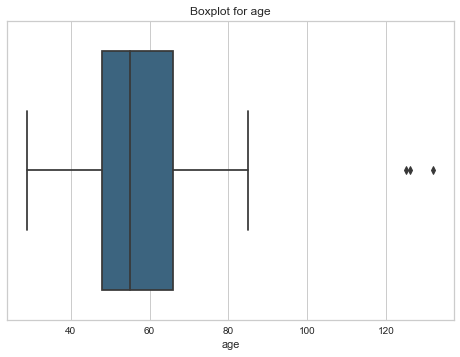

([125, 132, 126], [125, 132, 126], [], 21.0, 93.0)

In [28]:
calculate_outliers(clean_data, 'age')

Outliers for column 'age': [125, 132, 126]
Lower Bound: 21.0
Upper Bound: 93.0


c:\Users\sophia\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


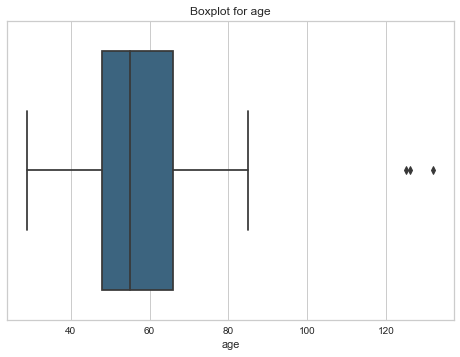

In [29]:
outliers_age, outlier_above_age, outlier_below_age, lower_bound_age, upper_bound_age = calculate_outliers(clean_data, 'age')


c:\Users\sophia\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


85

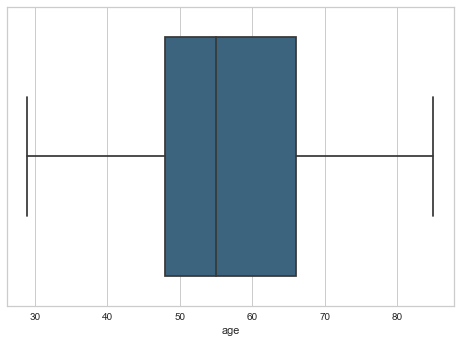

In [30]:
clean_data=clean_data[~clean_data['age'].isin(outlier_above_age)]
sns.boxplot(clean_data['age'],color='#31668a')
clean_data['age'].max()

Outliers for column 'Income': [157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0]
Lower Bound: -13614.0
Upper Bound: 117418.0


c:\Users\sophia\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


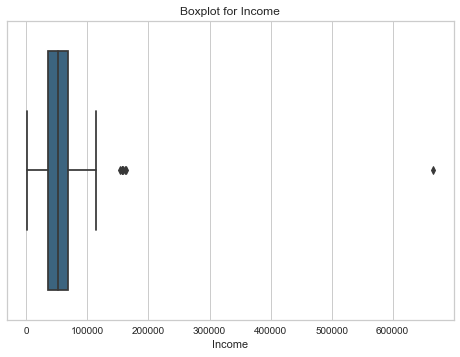

([157243.0,
  162397.0,
  153924.0,
  160803.0,
  157733.0,
  157146.0,
  156924.0,
  666666.0],
 [157243.0,
  162397.0,
  153924.0,
  160803.0,
  157733.0,
  157146.0,
  156924.0,
  666666.0],
 [],
 -13614.0,
 117418.0)

In [31]:
calculate_outliers(clean_data, 'Income')

c:\Users\sophia\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


162397.0

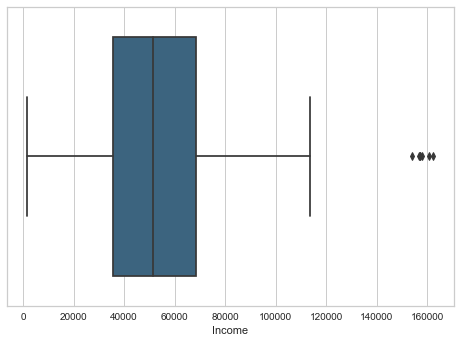

In [32]:
outliers_Income=[666666.0]
clean_data=clean_data[~clean_data['Income'].isin(outliers_Income)]
sns.boxplot(clean_data['Income'],color='#31668a')
clean_data['Income'].max()

<Figure size 576x396 with 0 Axes>

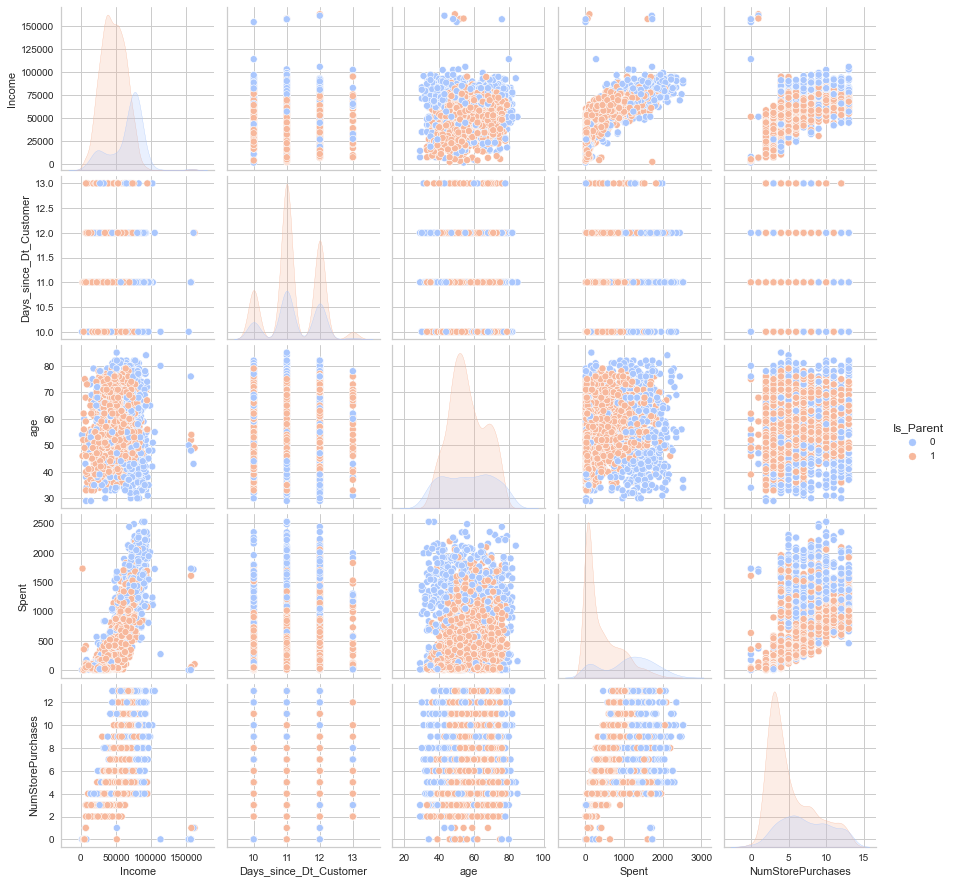

In [33]:
plt.figure()  
sns.pairplot(clean_data, vars= ["Income", "Days_since_Dt_Customer", "age", "Spent", 'NumStorePurchases'],hue='Is_Parent',palette="coolwarm")  

plt.show()  

In [34]:

def Bar_Chart(data, f1):
    # Group by feature and count the rows for each group
    clean_data_feature = data.groupby(f1).size().sort_values(ascending=False)
    
    # Plot the grouped data
    clean_data_feature.plot(kind='bar', figsize=(12, 8), fontsize=15, color=['steelblue'])
    
    # Set the title and axis labels
    plt.title(f"{f1.capitalize()} Count Distribution", weight='bold', fontsize=20)
    plt.xlabel(f"{f1.capitalize()}", weight='bold', fontsize=17)
    plt.ylabel("Count", weight='bold', fontsize=17)
    
    # Rotate x-ticks, adjust grid and style
    plt.xticks(rotation=0)
    plt.grid(axis="x")
    
    # Remove the left spine for aesthetic purposes
    sns.despine(left=True)
    
    # Show the plot
    plt.show()


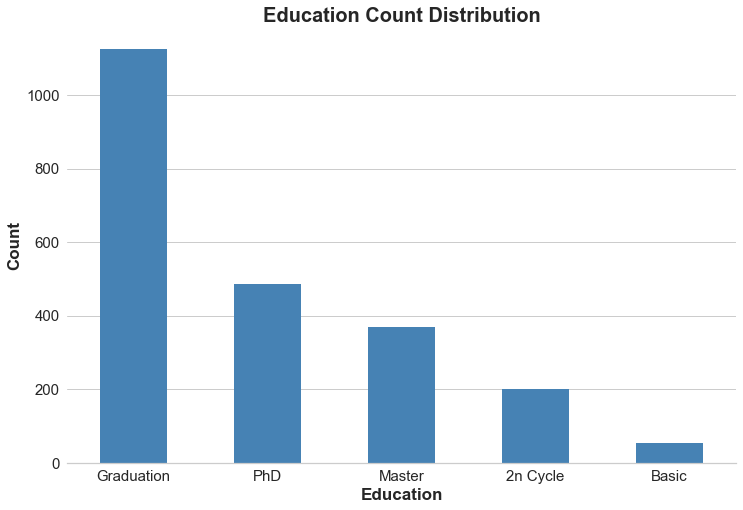

In [35]:
Bar_Chart(clean_data,'Education')

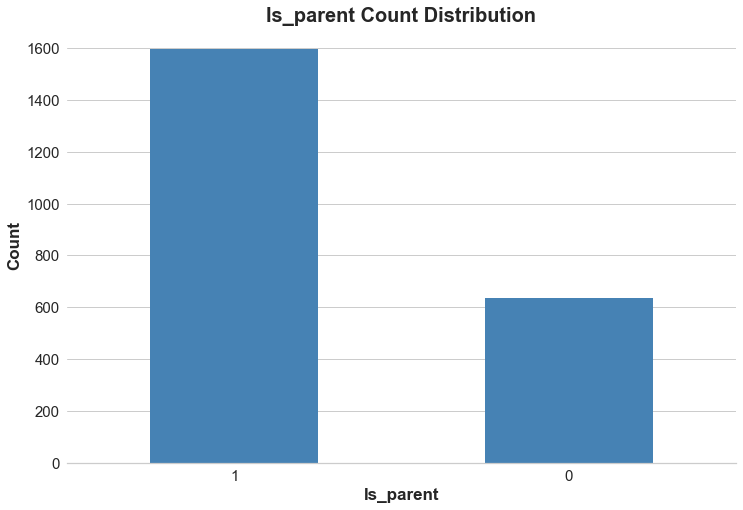

In [36]:
Bar_Chart(clean_data,'Is_Parent')

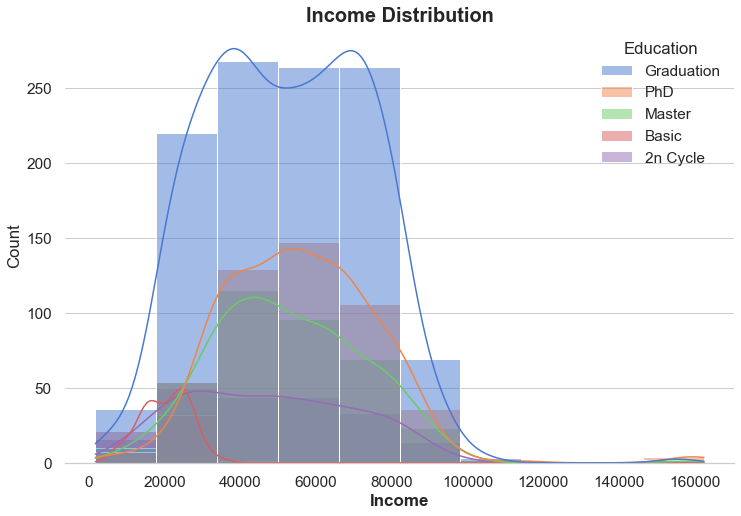

In [37]:
hitogram(clean_data,'Income','Education')

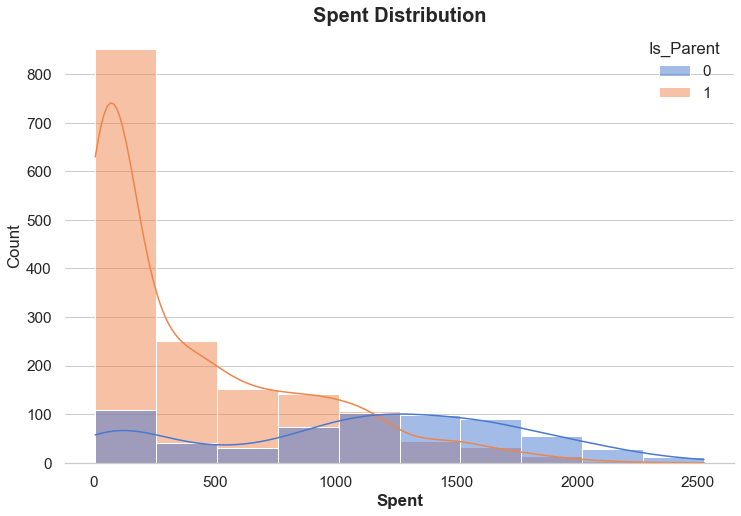

In [38]:
hitogram(clean_data,'Spent','Is_Parent')

## DATA PREPROCESSING

In [39]:
categorical_list=(clean_data.dtypes=='object')
categorical_list

ID                        False
Education                  True
Income                    False
Recency                   False
NumDealsPurchases         False
NumWebPurchases           False
NumCatalogPurchases       False
NumStorePurchases         False
NumWebVisitsMonth         False
Response                  False
Days_since_Dt_Customer    False
Spent                     False
Living_With                True
Children                  False
Is_Parent                 False
age                       False
dtype: bool

In [40]:
#Get list of categorical variables
object_cols = list(categorical_list[categorical_list].index)
object_cols

['Education', 'Living_With']

In [41]:
le=LabelEncoder()

for i in object_cols:
    clean_data[i]=clean_data[[i]].apply(le.fit_transform)


In [42]:
process_data = clean_data.copy()
process_data.head()

,ID,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Days_since_Dt_Customer,Spent,Living_With,Children,Is_Parent,age
0,5524,2,58138.0,58,3,8,10,4,7,1,12,1617,0,0,0,68
1,2174,2,46344.0,38,2,1,1,2,5,0,10,27,0,2,1,71
2,4141,2,71613.0,26,1,8,2,10,4,0,11,776,1,0,0,60
3,6182,2,26646.0,26,2,2,0,4,6,0,10,53,1,1,1,41
4,5324,4,58293.0,94,5,5,3,6,5,0,11,422,1,1,1,44


In [43]:
process_data = process_data.drop('ID', axis=1)

In [44]:
#Scaling
scaler = StandardScaler()
scaler.fit(process_data)
scaled_process_data = pd.DataFrame(scaler.transform(process_data),columns= process_data.columns )
scaled_process_data .head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Days_since_Dt_Customer,Spent,Living_With,Children,Is_Parent,age
0,-0.352133,0.288947,0.306856,0.348738,1.407639,2.509801,-0.552429,0.692865,2.386338,1.091963,1.680176,-1.347635,-1.264308,-1.584362,1.016868
1,-0.352133,-0.262003,-0.383971,-0.168700,-1.110921,-0.568970,-1.167738,-0.131421,-0.419052,-1.663826,-0.962202,-1.347635,1.395139,0.631169,1.273264
2,-0.352133,0.918423,-0.798467,-0.686137,1.407639,-0.226884,1.293496,-0.543564,-0.419052,-0.285932,0.282541,0.742041,-1.264308,-1.584362,0.333146
3,-0.352133,-1.182183,-0.798467,-0.168700,-0.751127,-0.911056,-0.552429,0.280722,-0.419052,-1.663826,-0.918994,0.742041,0.065416,0.631169,-1.290693
4,1.429245,0.296187,1.550344,1.383614,0.328256,0.115201,0.062879,-0.131421,-0.419052,-0.285932,-0.305762,0.742041,0.065416,0.631169,-1.034298


In [45]:
scaled_process_data.isnull().sum()

Education                 0
Income                    0
Recency                   0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
Response                  0
Days_since_Dt_Customer    0
Spent                     0
Living_With               0
Children                  0
Is_Parent                 0
age                       0
dtype: int64

## PCA to reduce dimensionality

In [46]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_process_data)
PCA_ds = pd.DataFrame(pca.transform(scaled_process_data), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.0,3.177740e-17,2.132870,-5.755123,-1.906040,-0.514650,1.645741,6.625008
col2,2236.0,-1.588870e-17,1.402837,-3.524755,-1.013754,-0.239205,0.933901,5.710005
col3,2236.0,-4.289949e-17,1.192433,-2.958849,-0.861233,-0.094084,0.760064,4.537267


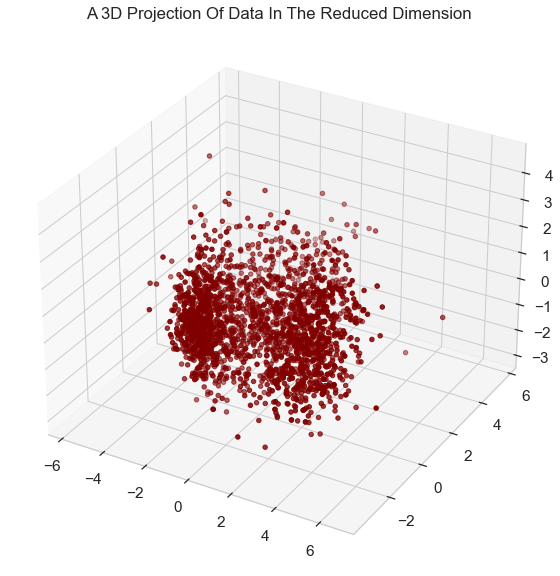

In [47]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Clustering

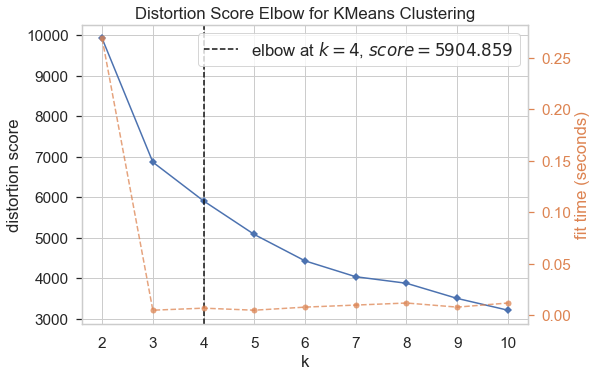

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
scaled_process_data["Clusters"]= yhat_AC

In [57]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])


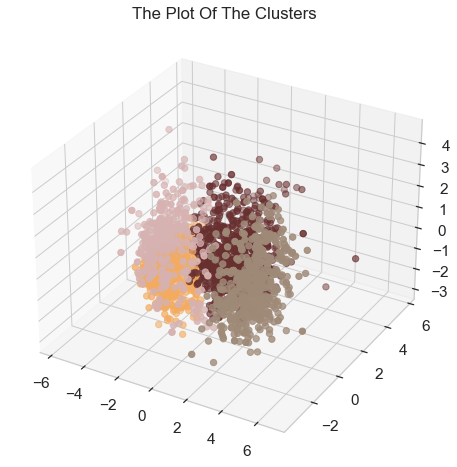

In [61]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=scaled_process_data["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

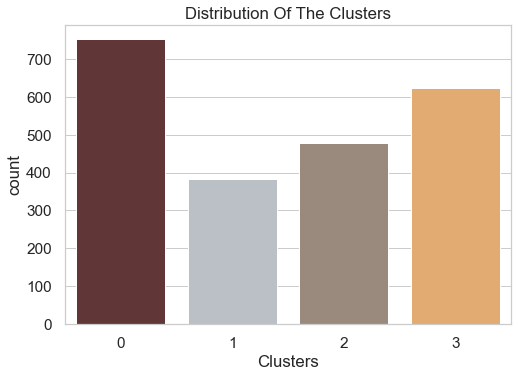

In [62]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=scaled_process_data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [67]:
scaled_process_data.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Days_since_Dt_Customer,Spent,Living_With,Children,Is_Parent,age,Clusters
0,-0.352133,0.288947,0.306856,0.348738,1.407639,2.509801,-0.552429,0.692865,2.386338,1.091963,1.680176,-1.347635,-1.264308,-1.584362,1.016868,2
1,-0.352133,-0.262003,-0.383971,-0.168700,-1.110921,-0.568970,-1.167738,-0.131421,-0.419052,-1.663826,-0.962202,-1.347635,1.395139,0.631169,1.273264,3
2,-0.352133,0.918423,-0.798467,-0.686137,1.407639,-0.226884,1.293496,-0.543564,-0.419052,-0.285932,0.282541,0.742041,-1.264308,-1.584362,0.333146,2
3,-0.352133,-1.182183,-0.798467,-0.168700,-0.751127,-0.911056,-0.552429,0.280722,-0.419052,-1.663826,-0.918994,0.742041,0.065416,0.631169,-1.290693,3
4,1.429245,0.296187,1.550344,1.383614,0.328256,0.115201,0.062879,-0.131421,-0.419052,-0.285932,-0.305762,0.742041,0.065416,0.631169,-1.034298,0


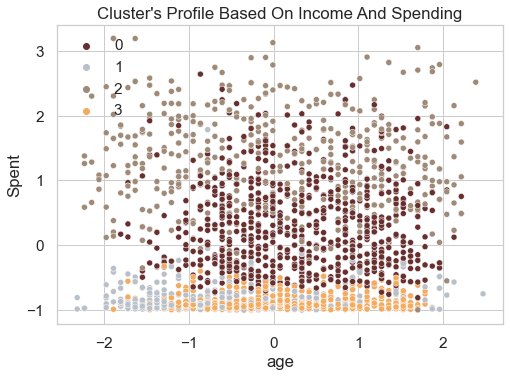

In [77]:
pl = sns.scatterplot(data = scaled_process_data,x=scaled_process_data["age"], y=scaled_process_data["Spent"],hue=scaled_process_data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

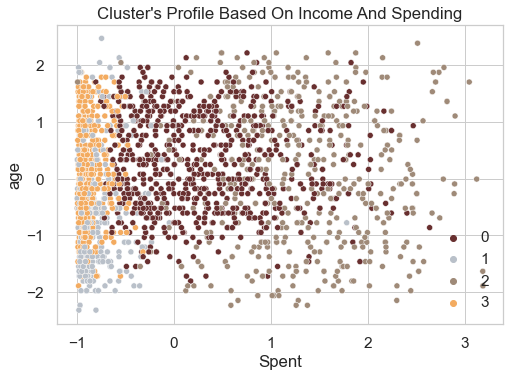

In [69]:
pl = sns.scatterplot(data = scaled_process_data,x=scaled_process_data["Spent"], y=scaled_process_data["age"],hue=scaled_process_data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

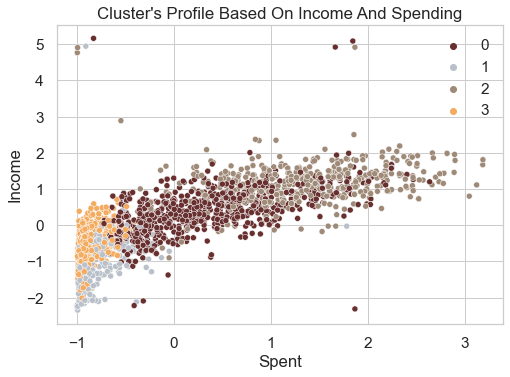

In [78]:
pl = sns.scatterplot(data = scaled_process_data,x=scaled_process_data["Spent"], y=scaled_process_data["Income"],hue=scaled_process_data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

c:\Users\sophia\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\sophia\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\sophia\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\sophia\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg

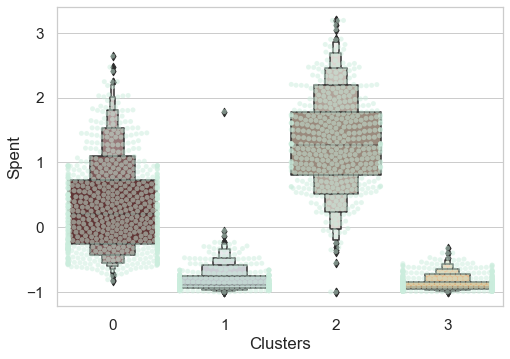

In [79]:
plt.figure()
pl=sns.swarmplot(x=scaled_process_data["Clusters"], y=scaled_process_data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=scaled_process_data["Clusters"], y=scaled_process_data["Spent"], palette=pal)
plt.show()

NameError: name 'cmap' is not defined

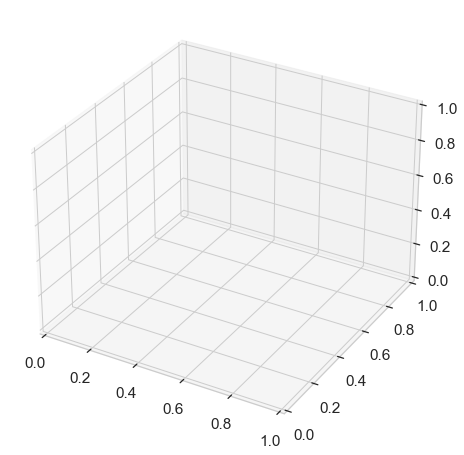

In [85]:
from scipy.stats import norm

# Given Z-score
z1 = -0.5
z2= 0.5

# Calculate the cumulative probability using the CDF
probability1 = norm.cdf(z2)-norm.cdf(z1)
probability1



0.38292492254802624

In [88]:
t_statistic=2.37
df=39
p_value = 2 * (1 - t.cdf(abs(t_statistic), df))
p_value

0.022829835897188344